# mtcars

In this notebook, you'll explore the iconic `mtcars` dataset. Why mtcars? Because it is a classic pedagogical dataset and there is A LOT written about it online. Every complicated concept we encounter, you should be able to google the name plus `mtcars` and find some information about it. So for example, when we study linear regression, you'll be able to google "linear regression mtcars" and find a million billion tutorials that use this dataset to teach regressions. It will give us a common vocabulary with other learners around the world. 

### Standard Python and R imports

In [52]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [54]:
%%R

# My commonly used R imports

require('tidyverse')


In [55]:
%%R 

require('ggpub_R')

R[write to console]: Loading required package: ggpub_R



In [56]:
# EXAMPLE PYTHON CELL

df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
df.head()

,A,B
0,51,43
1,30,55
2,39,79
3,34,6
4,74,52


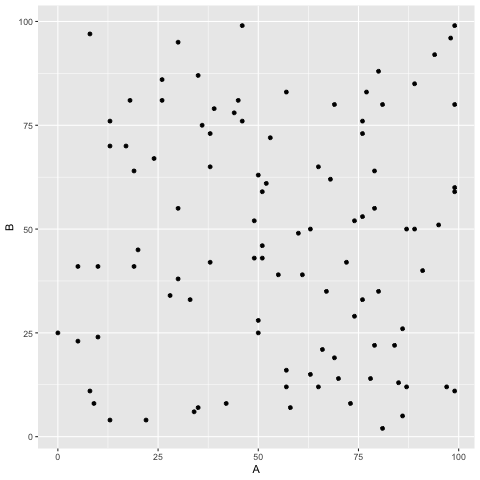

In [57]:
%%R -i df

# EXAMPLE R CELL
df
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

## Load the data

In [112]:
# Import data in python
mtcars = pd.read_csv('mtcars.csv')

mtcars['am'] = mtcars['am'].replace({0: 'automatic', 1: 'manual'})

# save to csv file

mtcars.to_csv('mtcars.csv', index=False)

In [113]:
%%R
 
# Import data with R
mtcars <- read_csv('mtcars.csv', show_col_types = FALSE)
mtcars %>% head(4)

# A tibble: 4 × 12
  name           mpg   cyl  disp    hp  drat    wt  qsec    vs am     gear  carb
  <chr>        <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <chr> <dbl> <dbl>
1 Mazda RX4     21       6   160   110  3.9   2.62  16.5     0 manu…     4     4
2 Mazda RX4 W…  21       6   160   110  3.9   2.88  17.0     0 manu…     4     4
3 Datsun 710    22.8     4   108    93  3.85  2.32  18.6     1 manu…     4     1
4 Hornet 4 Dr…  21.4     6   258   110  3.08  3.22  19.4     1 auto…     3     1


# Exploratory data analysis

So far we've done a lot of looking at distributions of single variables. In this dataset we have some continuous variables (like `mpg`, `disp`, `hp`, `drat`, `wt`, and `qsec`) and some discrete variables (like `vs`, `am`, `gear`, and `carb`). Let's quickly glance through the distributions of them.




In [114]:
%%R 

continuous_variables <- c('mpg', 'disp', 'hp', 'drat', 'wt', 'qsec')
discrete_variables   <- c('vs', 'am', 'gear', 'carb')

# Conevert to long format
mtcars_long = mtcars %>% pivot_longer(!name, names_to = 'variable', values_to = 'value') 

# plot only continuous variables
to_plot <- mtcars_long %>% filter(variable %in% continuous_variables)

histogram_means <- to_plot %>%
  group_by(variable) %>%
  summarise(mean = mean(value))

plot_continuous_histograms <- ggplot(to_plot) +
    aes(x=value, fill=variable, group=variable) +
    geom_histogram(bins=5) +
    geom_vline(data=histogram_means, aes(xintercept=mean)) +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='continuous variables (means marked with a vertical line)')


plot_continuous_dotplot <- ggplot(to_plot) +
    aes(x=value, y=1, color=variable) +
    geom_point(size=4, alpha=.2) +
    stat_summary(fun.y= mean, geom="point", shape='x',
                 size=10, color="black", alpha=1, orientation='y') +
    facet_wrap(~variable, scales='free', ncol=1) +
    theme_minimal() +
    labs(
        title = 'mtcars at a glance', 
        subtitle='continuous variables (means marked with an X)'
    ) +
    theme(
            axis.text.y=element_blank(),  #remove y axis labels
            axis.ticks.y=element_blank(),  #remove y axis ticks
            panel.grid.major.y = element_blank(), #remove y axis grid
            panel.grid.minor.y = element_blank(), #remove y axis grid
    )

# display both plots
print(plot_continuous_histograms)
print(plot_continuous_dotplot)

Error in `pivot_longer_spec()`:
! Can't combine `mpg` <double> and `am` <character>.
Run `rlang::last_error()` to see where the error occurred.


R[write to console]: Warning messages:

R[write to console]: 1: The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor? 

R[write to console]: 2: The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor? 

R[write to console]: 3: The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor? 

R[write to console]: 4: The following aesthetics were dropped during statis


Error in pivot_longer_spec(data, spec, names_repair = names_repair, values_drop_na = values_drop_na,  :


RInterpreterError: Failed to parse and evaluate line '\ncontinuous_variables <- c(\'mpg\', \'disp\', \'hp\', \'drat\', \'wt\', \'qsec\')\ndiscrete_variables   <- c(\'vs\', \'am\', \'gear\', \'carb\')\n\n# Conevert to long format\nmtcars_long = mtcars %>% pivot_longer(!name, names_to = \'variable\', values_to = \'value\') \n\n# plot only continuous variables\nto_plot <- mtcars_long %>% filter(variable %in% continuous_variables)\n\nhistogram_means <- to_plot %>%\n  group_by(variable) %>%\n  summarise(mean = mean(value))\n\nplot_continuous_histograms <- ggplot(to_plot) +\n    aes(x=value, fill=variable, group=variable) +\n    geom_histogram(bins=5) +\n    geom_vline(data=histogram_means, aes(xintercept=mean)) +\n    facet_wrap(~variable, scales=\'free\') +\n    theme_minimal() +\n    labs(title = \'mtcars at a glance\', subtitle=\'continuous variables (means marked with a vertical line)\')\n\n\nplot_continuous_dotplot <- ggplot(to_plot) +\n    aes(x=value, y=1, color=variable) +\n    geom_point(size=4, alpha=.2) +\n    stat_summary(fun.y= mean, geom="point", shape=\'x\',\n                 size=10, color="black", alpha=1, orientation=\'y\') +\n    facet_wrap(~variable, scales=\'free\', ncol=1) +\n    theme_minimal() +\n    labs(\n        title = \'mtcars at a glance\', \n        subtitle=\'continuous variables (means marked with an X)\'\n    ) +\n    theme(\n            axis.text.y=element_blank(),  #remove y axis labels\n            axis.ticks.y=element_blank(),  #remove y axis ticks\n            panel.grid.major.y = element_blank(), #remove y axis grid\n            panel.grid.minor.y = element_blank(), #remove y axis grid\n    )\n\n# display both plots\nprint(plot_continuous_histograms)\nprint(plot_continuous_dotplot)\n'.
R error message: 'Error in pivot_longer_spec(data, spec, names_repair = names_repair, values_drop_na = values_drop_na,  :'

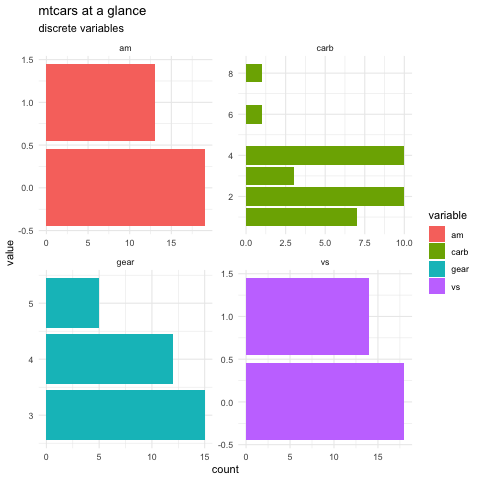

In [61]:
%%R 

# plot only discrete variables
to_plot <- mtcars_long %>% filter(variable %in% discrete_variables)

plot_discrete <- ggplot(to_plot) +
    aes(y=value, fill=variable) +
    geom_bar() +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='discrete variables')


plot_discrete

👉 What can we conclude about this dataset from the charts above?

In [62]:
# Not very much 

# We can see however, in a more detailed way, which variables are in the dataset and what type they are (discrete v. continuous)

# We can also see some averages: the mean for the continuous variables and the mode for the discrete variables 

👉 What can we not conclude about this dataset from the charts above?

In [63]:
# We can not see how the values for different variables vary by car type, which is probably what this dataset would be most useful for

👉 What further questions about this data do you have now? 

In [64]:
# I looked up what each variable is but I still have questions about what those are (so mechanical questions... rear axle ratio?)

# Comparing variables to one another

You're welcome to explore those univariate distributions more, but let's focus on something new. Comparing variables to one another. I'll start you off with a basic scatter plot.


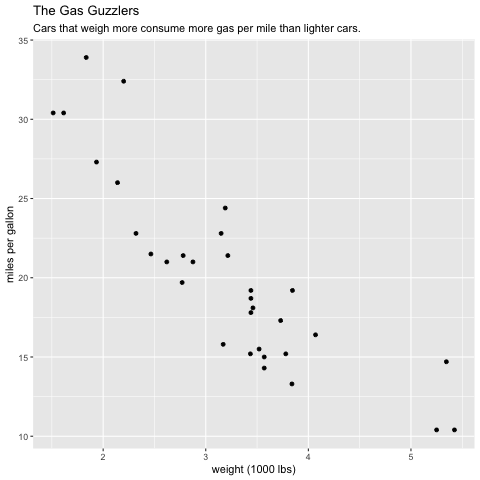

In [65]:
%%R

ggplot(mtcars) +
    aes(y=mpg, x=wt) +
    labs(y='miles per gallon', x='weight (1000 lbs)', title='The Gas Guzzlers', subtitle='Cars that weigh more consume more gas per mile than lighter cars.') +
    
    geom_point()

# 👉 Try It

1. Improve the chart above. Add a title and subtitle, and better axis labels. Be **very careful** about the language you use in the headline. Assume you have a very strict copyeditor, make the language easy to understand but make sure you're not saying more than what the data proves.

2. Answer the questions below:

    a. What can we conclude about fuel efficiency and weight

        We can identify a trend: the heavie the car, the fewer miles per gallon. 

    b. What can't we conclude about fuel efficiency and weight

        How  strong is the correlation? Is it statistically significant? 

    c. What further questions do you have about this data?

        Are there other factors which affect fuel efficiency? Should we be controlling for variables other than weight?

## Part 1 (Gudied Inquiry)
# 👉 What makes cars more fuel efficient?


In [66]:
# Are automatic cars more fuel efficient? 

    # My suspicion is that, maybe yes? I think that perhaps automatic cars are newer and therefore more fuel efficient

In [67]:
# Does horsepower correlate with fuel efficiency?

## Part 2 (freeform inquiry)
Ask and try to answer your own questions about the dataset. Make at least two such charts below:


# 👉 Question 1: TKTK

(replace the text in this cell with your question)

### 👉 Charts or summary statistics to help answer your question

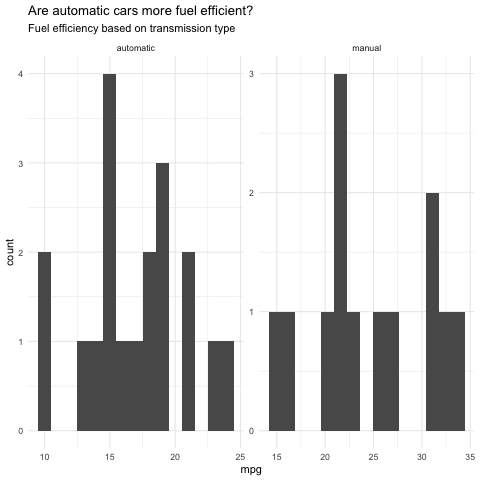

In [115]:
%%R 

ggplot(mtcars) +
    aes(x=mpg) +
    geom_histogram(bins=15) +
    facet_wrap(~am, scales='free') +
    theme_minimal() +
    labs(title = 'Are automatic cars more fuel efficient?', subtitle='Fuel efficiency based on transmission type')

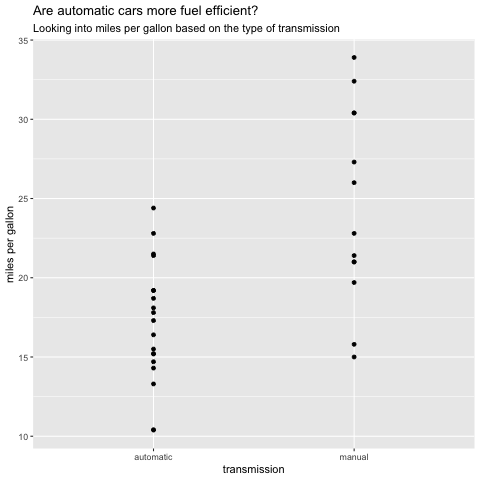

In [116]:
%%R

ggplot(mtcars) +
    aes(y=mpg, x=am) +
    labs(y='miles per gallon', x='transmission', title='Are automatic cars more fuel efficient?', subtitle='Looking into miles per gallon based on the type of transmission') +
    
    geom_point()

### 👉 Reflection

a. What can we conclude?

    It's hard to make any sense of the histogram, but the dot plot does give a better sense of the distribution of mpg based on the transmission type. It seems based on that that automatic cars do not cover more miles per gallon (i.e. are less fuel efficient)

b. What can't we conclude?

    I'm not sure how certain we can be of this - are there other factors which contribute to this? Are we comparing the same kind of cars? 

c. What further questions does this analysis raise?

    What vehicle types are we looking at? Should we be breaking them down into subgroups in order to do this comparison?
